# Titanic: Machine Learning from Disaster
[Kaggle page for this problem](https://www.kaggle.com/c/titanic/data)

*Amir Hossein Binesh*, Amir Kabir University of Tehran

---

## Part 1 : Read data, visualize and preprocess

**Reading the data**

In [1]:
import pandas as pd


# Read train data
train_df = pd.read_csv('train.csv', index_col='PassengerId')

In [2]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# Number of features and data for train data
print("Number of features : ", len(train_df.columns))
print("Number of data : ", len(train_df.index))

Number of features :  11
Number of data :  891


----

**Visualize the data**
        
With a little bit of common sense, and according to Titanic the movie, which I vaguely remember, we examine the features, to get a grasp of the data.
This helps to choose features in next steps.

"Women and children first", that gives a fairly easy clue, sex and age.
The other thing is money, all the Pclass, Cabin, Fare and Ticket features point to this very specific matter, and also that lines up with the movie, so we have to have an eye on that.

By the way, I couldn't find Jack in the data set, so maybe it's an alternative reality, who knows?

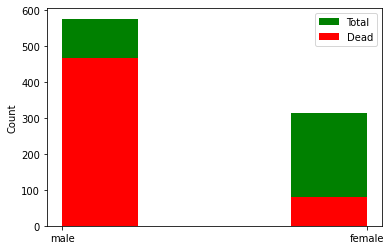

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Fraction of survival and death for men and women
dead_df = train_df[train_df['Survived'] == 0]
alive_df = train_df[train_df['Survived'] == 1]
plt.hist(train_df['Sex'].values, histtype='bar', bins=4, color = "green")
plt.hist(dead_df['Sex'].values, histtype='bar', bins=4, color = "red")


plt.ylabel('Count')
plt.legend(('Total', 'Dead'))

plt.show()

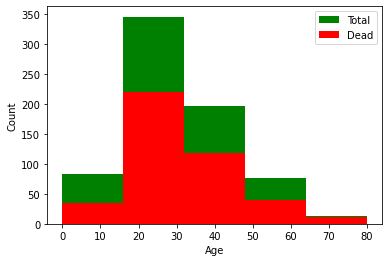

In [5]:
plt.hist(train_df['Age'].dropna(axis = 0).values, bins=5, color = "green", range = (0, 80))
plt.hist(dead_df['Age'].dropna(axis = 0).values, bins=5, color = "red", range = (0, 80))


plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(('Total', 'Dead'))

plt.show()

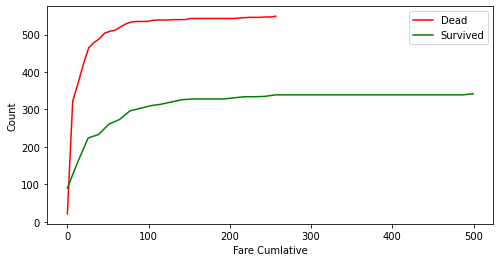

In [6]:
import numpy as np

x = dead_df['Fare'].dropna(axis = 0).values
y = alive_df['Fare'].dropna(axis = 0).values


fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
dvalues, dbase = np.histogram(x, bins=40)
cumulative = np.cumsum(dvalues)
plt.plot(dbase[:-1], cumulative, c='red')

avalues, abase = np.histogram(y, bins = 40)
cumulative = np.cumsum(avalues)
plt.plot(abase[:-1], cumulative, c='green')


plt.ylabel('Count')
plt.xlabel('Fare Cumlative')
plt.legend(('Dead', 'Survived'))
plt.show()


---

**Data Preprocessing**

In this part we mix correlated features. Decision trees do not need normalization nor discretization, but all the features we're going to use must be numeric.

What features to pick?
As mentioned before, all the Pclass, Cabin, Fare and Ticket features, can sum up into one feature. The cabin NaN is probably for workers, we can make sure with a correlation method with fare, which is done below.

So the Pclass and fare can represent the wealth. We can also use Viktor Frankl teachings to add SibSp and Parch.

The other features are irrelevant to me. I saw someone used name the classify individual values, that's a neat idea, but I don't think that's gonna work in decision trees [(Link to this notebook)](https://www.kaggle.com/blackhurt/my-approach-to-be-in-top-2).

In [7]:
train_df.corr(method ='kendall')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


Correlation(Pclass, Fare) = -0.57, which is good, but not enough to ignore one over another right away.

In [8]:
# Count null data
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Use mean of age for NaN ages
mean_age = round(train_df.mean(axis = 0, skipna = True)['Age'])
train_df['Age'] = train_df['Age'].fillna(mean_age)

# Set Other NaNs
train_df['Cabin'] = train_df['Cabin'].fillna("NoRoom")

mode_embarked = train_df.mode(axis = 0, dropna = True)['Embarked'][0]
train_df['Embarked'] = train_df['Embarked'].fillna(mode_embarked)

In [10]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [11]:
# This piece of code, make a column into a numeric column
# Since we decided to not use Cabin, I comment this out

train_df['Sex'].replace(['female', 'male'],[-1, 1], inplace=True)
train_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [12]:
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [13]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NoRoom,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,38.0,1,0,PC 17599,71.2833,C85,1,2
3,1,3,"Heikkinen, Miss. Laina",-1,26.0,0,0,STON/O2. 3101282,7.9250,NoRoom,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,35.0,1,0,113803,53.1000,C123,0,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NoRoom,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NoRoom,0,1
888,1,1,"Graham, Miss. Margaret Edith",-1,19.0,0,0,112053,30.0000,B42,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1,30.0,1,2,W./C. 6607,23.4500,NoRoom,0,4


In [14]:
import numpy as np

def classifyCabins(df):
    conditions = [
        (df['Cabin'].str.startswith("A")),
        (df['Cabin'].str.startswith("B")),
        (df['Cabin'].str.startswith("C")),
        (df['Cabin'].str.startswith("D")),
        (df['Cabin'].str.startswith("E")),
        (df['Cabin'].str.startswith("F")),
        (df['Cabin'].str.startswith("G"))
    ]
    choices = [1, 2, 3, 4, 5, 6, 7]
    df['cCabin'] = np.select(conditions, choices, default= 0)
    return df

train_df = classifyCabins(train_df)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,cCabin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NoRoom,0,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,38.0,1,0,PC 17599,71.2833,C85,1,2,3
3,1,3,"Heikkinen, Miss. Laina",-1,26.0,0,0,STON/O2. 3101282,7.9250,NoRoom,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,35.0,1,0,113803,53.1000,C123,0,2,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NoRoom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NoRoom,0,1,0
888,1,1,"Graham, Miss. Margaret Edith",-1,19.0,0,0,112053,30.0000,B42,0,1,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1,30.0,1,2,W./C. 6607,23.4500,NoRoom,0,4,0


---

## Part 2 : Training and testing the decision tree

**Splitting dataset**

In [15]:
from sklearn.model_selection import train_test_split

TEST_FRACTION = .2
# Set this to have the same train and test set to compare with random forest
NOT_RANDOM_STATE = 58
features = ['Age', 'Sex', 'Fare', 'Pclass', 'Embarked', 'FamSize', 'cCabin']
X = train_df[features]
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION, random_state = NOT_RANDOM_STATE)
X_train

,Age,Sex,Fare,Pclass,Embarked,FamSize,cCabin
PassengerId,,,,,,,
278,30.00,1,0.0000,2,0,1,0
539,30.00,1,14.5000,3,0,1,0
670,30.00,-1,52.0000,1,0,2,3
194,3.00,1,26.0000,2,0,3,6
733,30.00,1,0.0000,2,0,1,0
...,...,...,...,...,...,...,...
757,28.00,1,7.7958,3,0,1,0
26,38.00,-1,31.3875,3,0,7,0
792,16.00,1,26.0000,2,0,1,0


**Training**

In [16]:
from sklearn import tree
import time

# == SETTINGS ==
MAX_DEPTH = 6
CRITERION = "gini"

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=MAX_DEPTH, criterion=CRITERION)
start = time.time()
clf = clf.fit(X_train, y_train)
stop = time.time()
# Training time in milliseconds
dt_train_time = (stop - start) * 1000

**Accuracy Calculation**

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, clf.predict(X_train))

0.8721910112359551

**Tree Visualization**

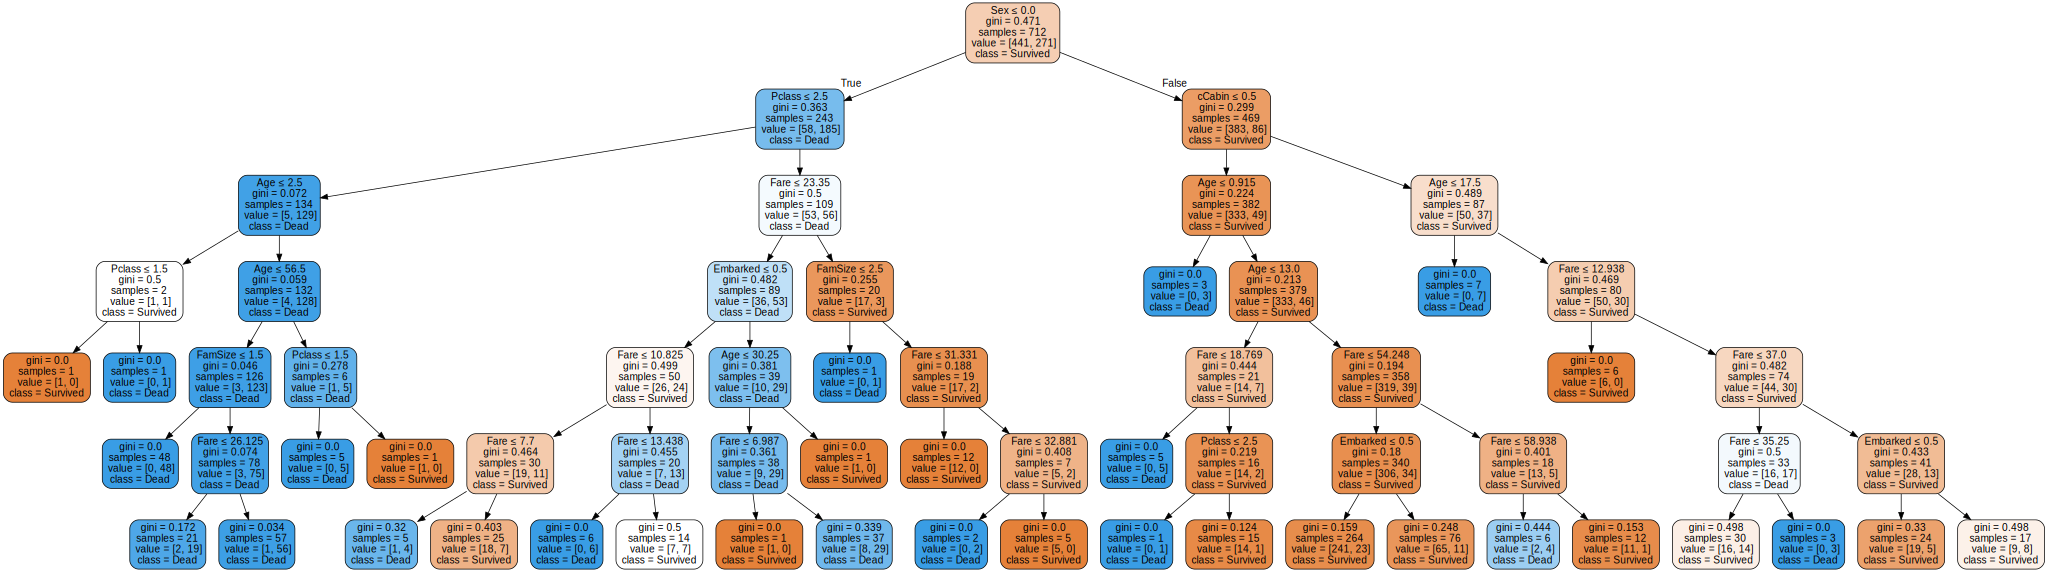

In [18]:
import graphviz

file_name = "Result-" + str(MAX_DEPTH) + "-" + CRITERION

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render(file_name)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['Survived', 'Dead'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Testing**

In [19]:
predicc = clf.predict(X_test)

In [20]:
start = time.time()
acc = accuracy_score(y_test, predicc)
stop = time.time()
dt_test_time = (stop - start) * 100
acc

0.8100558659217877

**Gini vs Entropy with different depth**

In [21]:
def compare_dt(start, end, step = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION)
    criterions = ['gini', 'entropy']
    n = end + 1 - start
    train_results = []
    test_results = []
    
    for c in criterions:
        for i in range(start, end + 1, step):
            clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i, criterion=c)
            clf = clf.fit(X_train, y_train)
            test_results.append(accuracy_score(y_test, clf.predict(X_test)))
    
    return list(range(start, end + 1, step)), test_results[0:n], test_results[n:n*2]
    

d, test_gini, test_ent = compare_dt(3, 10)

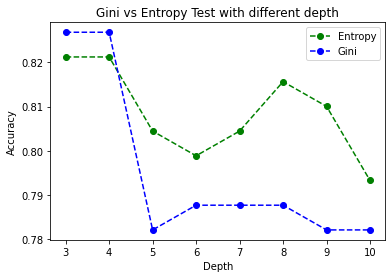

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(d, test_gini, linestyle='--', marker='o', color='g')
plt.plot(d, test_ent, linestyle='--', marker='o', color='b')

plt.legend(('Entropy', 'Gini'))
plt.title("Gini vs Entropy Test with different depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

## Part 3: Random Forest

**Training**

Instead of using a static max_depth, I'll use other criteria such as min_samples_leaf

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION, random_state = NOT_RANDOM_STATE)

clf = RandomForestClassifier(criterion='gini', n_estimators=500, n_jobs=-1, min_samples_split=10, min_samples_leaf=1)
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
rf_train_time = (stop - start) * 1000

In [24]:
accuracy_score(y, clf.predict(X))

0.8933782267115601

In [25]:
start = time.time()
predicc = clf.predict(X_test)
stop = time.time()
rf_test_time = (stop - start) * 1000
accuracy_score(y_test, predicc)

0.8324022346368715

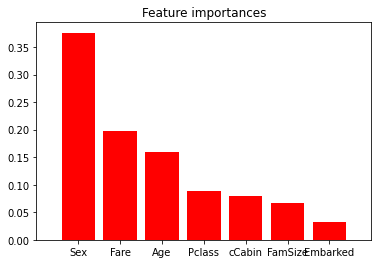

In [26]:
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), [x for _,x in sorted(zip(importances,features))][::-1])
plt.xlim([-1, X_train.shape[1]])
plt.show()

**Compare times for decision tree and random forest with 100 trees**

In [27]:
times = {'Train Time': [dt_train_time, rf_train_time],
        'Test Time': [dt_test_time, rf_test_time]}
times_df = pd.DataFrame (times, columns = ['Train Time','Test Time'], index=['Decision Tree','Random Forest'])
times_df

,Train Time,Test Time
Decision Tree,1.001358,0.099897
Random Forest,589.694738,103.321314


**Compare Decision tree and Random forest with different depths**

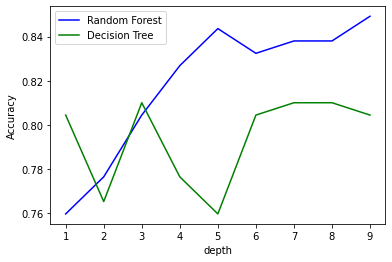

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION)
rf_res = []
dt_res = []
for i in range(1,10):
    rf_clf = RandomForestClassifier(max_depth=i, n_estimators=100, criterion='gini',n_jobs=-1, min_samples_split=10, min_samples_leaf=1)
    dt_clf = tree.DecisionTreeClassifier(max_depth=i, criterion='gini')
    rf_clf.fit(X_train, y_train)
    dt_clf.fit(X_train, y_train)
    rf_res.append(accuracy_score(y_test, rf_clf.predict(X_test)))
    dt_res.append(accuracy_score(y_test, dt_clf.predict(X_test)))
    
d = list(range(1,10))
plt.plot(d, rf_res, color='b')
plt.plot(d, dt_res, color='g')

plt.legend(('Random Forest', 'Decision Tree'))
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()

**Tweak Playground**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_FRACTION)
MAX_DEPTH_WEAK = 6
CRITERION_WEAK = "entropy"
clf = RandomForestClassifier(max_depth=MAX_DEPTH_WEAK, n_estimators=100, criterion=CRITERION_WEAK, n_jobs=-1, min_samples_split=10, min_samples_leaf=1)
clf.fit(X_train, y_train)
train_acc = accuracy_score(y, clf.predict(X))
test_acc  = accuracy_score(y_test, clf.predict(X_test))
print(train_acc, " : ", test_acc)

0.8585858585858586  :  0.8212290502793296
